In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
from statsmodels.graphics.gofplots import qqplot


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df_pontuacao = pd.read_csv('./datasets/pontuacao_teste.csv')

In [6]:
# Checar a estrutura do dataset

df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [7]:
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [8]:
# Vizualição o final do dataset
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


## EDA

In [9]:
# medidas estatisicas das variavies 
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

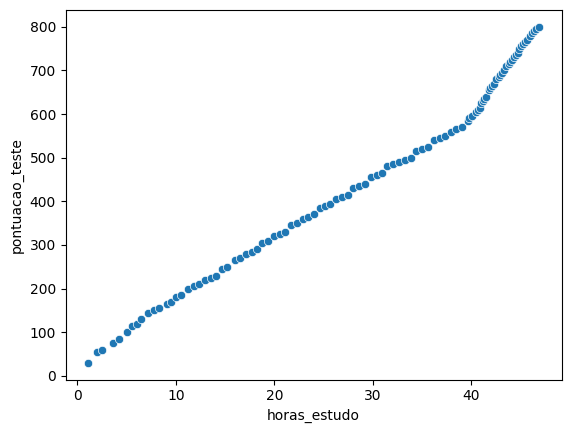

In [10]:
# plot de diperção
# X = horas_de_estudo
# Y =  pontuacao_test
sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

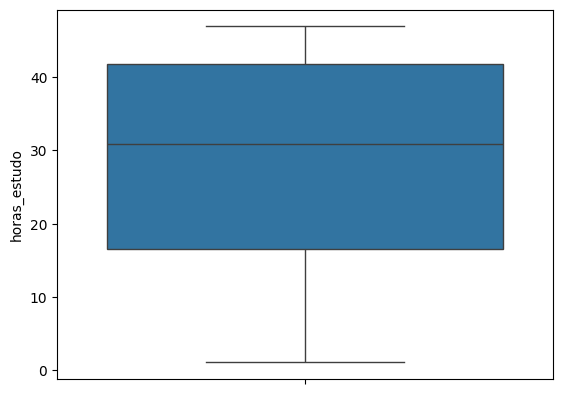

In [11]:
# Verificar os outliers (horas_estudo)

sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

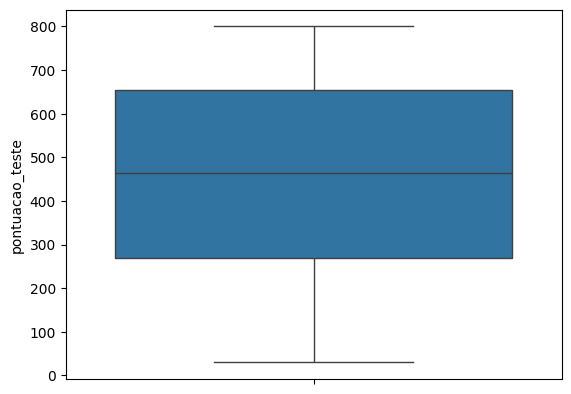

In [12]:
# Verificar os outliers (pontuacao_teste)

sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

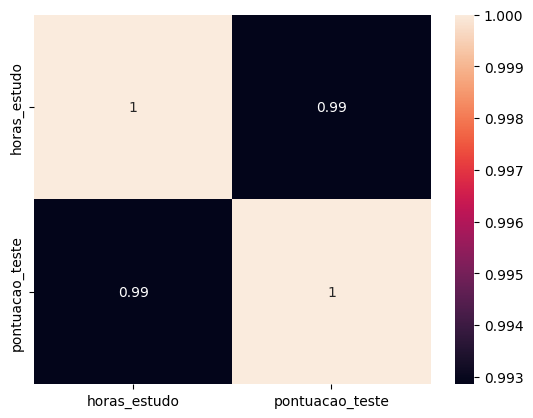

In [13]:
# Correlação de pearson

sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

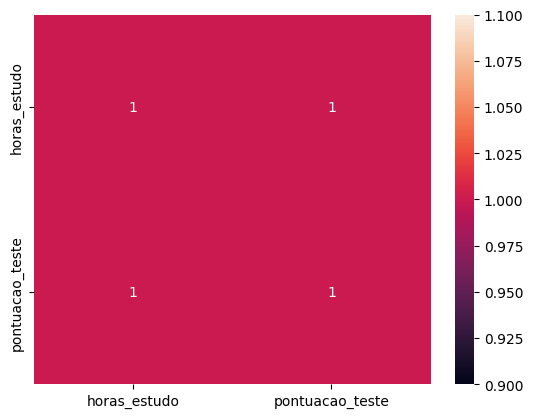

In [14]:
# Correlação de Spearman 

sns.heatmap(df_pontuacao.corr('spearman'), annot=True) 

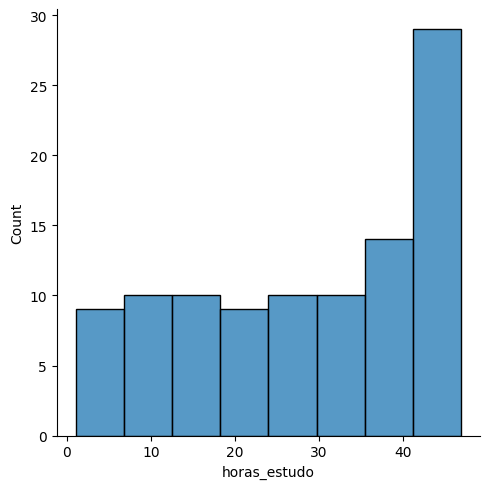

In [15]:
# histograma das variaveis
sns.displot(df_pontuacao, x='horas_estudo')

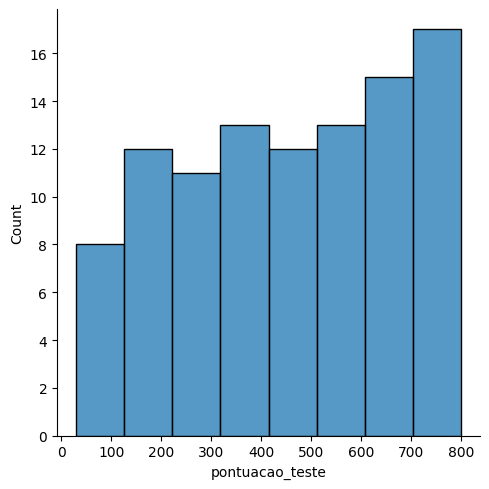

In [16]:
# histograma das variaveis
sns.displot(df_pontuacao, x='pontuacao_teste')

# Treinar Modelo


In [17]:
# Dividir datasets para treino e teste
# quando temos aoenas uma feature, precisamos ajustar o shape

X = df_pontuacao['horas_estudo'].values.reshape(-1,1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [18]:
#  Instanciar o modelo a ser treinado 
reg_model = LinearRegression()

In [19]:
# Treinar o modelo

reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# imprimir a equação da reta
# y = ax + b 
print('A Equação da era é y= {:4f}x +{:4f}'.format(reg_model.coef_[0][0],reg_model.intercept_[0]))

A Equação da era é y= 15.642619x +8.476601


## Validar o modelo - Metricas

In [21]:
# predição dos valores com base nos conjuntos de testes

y_pred = reg_model.predict(X_test)

In [22]:
# Calcular metrica R-squared ou Coeficiente de Determinação
# R2 representa a proporção na variação na variavel dependente que é explicada pela variavel idependente
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [23]:
# Calcular metrica de MAE (Mena absolute error)
# MAE = Media(y_test - y_pred)
# É uma metrica facil de interpretar
# MAE é menos sensivel a outliers
mean_absolute_error(y_test, y_pred)


22.957470277134615

In [24]:
# calcular métrica MSE (Mean squeared Error)
# MES = Média(y_test - y_pred)2
# Não é uma metrica fácil de interpretar
# MSE é mais sensivel a outliers e penaliza grandes Erros
mean_squared_error(y_test, y_pred)


766.9972992416427

In [25]:
# calcular métrica RMSE ( squeared Root Mean squeared Error)
# MES = Raiz (y_test - y_pred)2)
# É  uma metrica fácil de interpretar
# MSE é mais sensivel a outliers e penaliza grandes Erros
mean_squared_error(y_test,y_pred, squared=True)

TypeError: got an unexpected keyword argument 'squared'

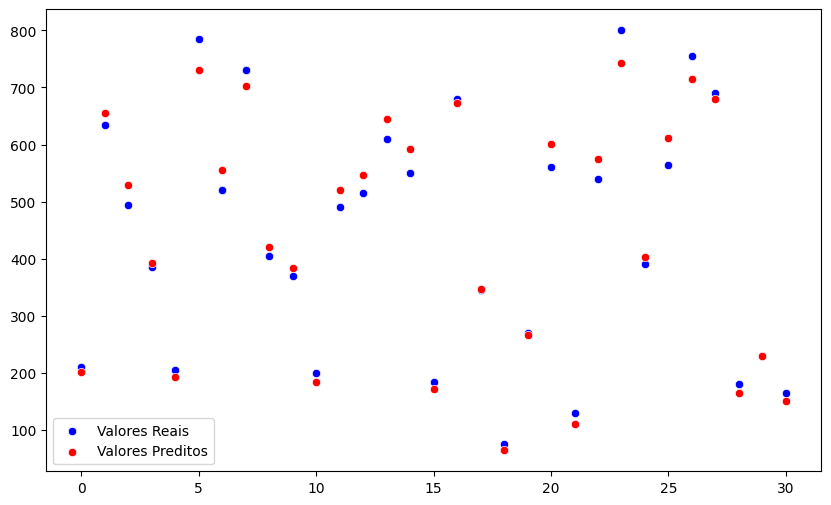

In [ ]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))

sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')

plt.legend()
plt.show()



## Análise de resíduos 

In [26]:
# Calcular Residos
residuos = y_test - y_pred

In [27]:
# Calcular os residuos Padronizados (Standardization)
# Para cada elemento de um conjunto (x - media / desvio_padrao)
from scipy.stats import zscore
residuos_std = zscore(residuos)

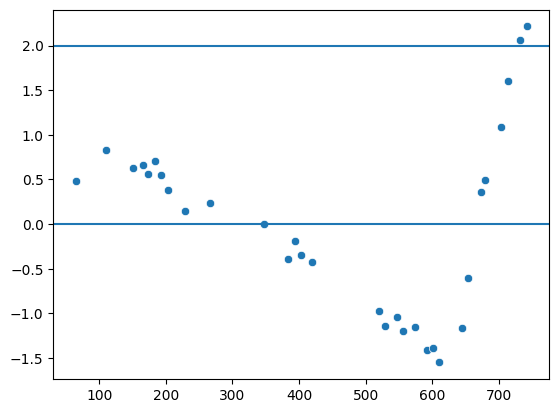

In [28]:
# Verificar lineardade do modelo :
# Se os residuos estiver entre -2 e +2 (na escala padrão) - indica linearidade

# Verificar homogeneidade das variancias (Homocedasticidade)
# Valores estiver em torno da reta, temos homocedasticidade, caso contrario
# Se tivermos alguma tendencia ou padrão ( Formam um cone, funil), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1),y=residuos_std.reshape(-1))
plt.axhline(y=0)
plt.axhline(y=2.0)

In [29]:
# Teste de Normalidade - Shapiro Wilk
# Hipotese 0 = Segue distruibuição normal
# Hipotese 1 - Não segue desbribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrario rejeitamos

stat_shapiro,p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.9500532226161759 e P-Valor: 0.15663817850304967


In [30]:
# Teste de Normalidade - Kolmogorov-Smirnov
# Hipotese 0 = Segue distruibuição normal
# Hipotese 1 - Não segue desbribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrario rejeitamos

stat_ks ,p_valor_ks = kstest(residuos.reshape(-1),'norm')
print("Estatística do teste: {} e P-Valor: {}".format(stat_ks , p_valor_ks))

Estatística do teste: 0.48355808450512827 e P-Valor: 3.395368995814077e-07


## Fazer Predições com o modelo

In [50]:
# Se eu estudar 30.4 horas, qual a pontuação prevista pelo modelo?

reg_model.predict([[30.4]])

array([[484.01220436]])

In [52]:
# Quantas horas estudar para obter 600 pontos
# y = ax + b
# y - b = ax
# (y - b) / a = x
# x = (y - b)/ a
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.81485802710669)

## Salvar Modelo para Usar Depois

In [54]:
import joblib
joblib.dump(reg_model, "Modelo_regresssao.plk")

['Modelo_regresssao.plk']